In [98]:
import math
import numpy as np
import pandas as pd
from sympy import var, solveset, S
from sympy import *
from sympy import Symbol
from matplotlib import pyplot as plt

In [99]:
#Input Database

N = 7
Pc = np.array([673.3, 709, 617.4, 550.4, 487, 439.6, 260]) #in Psi
Tc = np.array([342.67, 549.67, 665.77, 765.27, 845.28, 913.392, 1116]) #in Rankine
w = np.array([0.011, 0.099, 0.153, 0.199, 0.251, 0.3, 0.65])
MW = np.array([16.04, 30.07, 44.1, 58.12, 72.15, 86.18, 210])
y = np.array([0.74,0.05,0.04,0.04,0.03,0.02,0.08])
#Input PT Condition
R = 10.731577089016
T = 180

In [100]:
def ZBB(P,T):
  Pc = np.array([673.3, 709, 617.4, 550.4, 487, 439.6, 260]) #in Psi
  Tc = np.array([342.67, 549.67, 665.77, 765.27, 845.28, 913.392, 1116]) #in Rankine
  y = np.array([0.74,0.05,0.04,0.04,0.03,0.02,0.08])
  Ppc = 0
  Tpc = 0
  for i in range (N):
    Ppc += Pc[i]*y[i]
    Tpc += Tc[i]*y[i]
  Pr = P/Ppc
  Tr = (T+460)/Tpc
  A = 1.39*(Tr-0.92)**0.5-0.36*Tr-0.101
  A1 = (1-(1.39*(Tr-0.92)**0.5-0.36*Tr-0.101))/math.exp((0.62-0.23*Tr)*Pr+(0.066/(Tr-0.86)-0.037)*Pr**2+0.32/10**(9*(Tr-1))*Pr**6)
  A2 = (0.132-0.32*math.log(Tr,10))*Pr**(10**(0.3106-0.49*Tr+0.1824*Tr**2))
  return(A+A1+A2)

In [101]:
def vis_g(T, MWa, rho):
  A = ((9.379+0.01607*MWa)*(T+459.67)**1.5)/(209.2+19.26*MWa+(T+459.67))
  B = 3.448+986.4/(T+459.67)+0.01009*MWa
  C = 2.447-0.2224*B
  return(A*exp(B*rho**C)/(10**4))

In [102]:
MWa = 0
for i in range (N):
  MWa += MW[i]*y[i]
SG = MWa/28.97

In [105]:
result_y =[]
result_x =[]
result_Bg = []
result_rho = []
result_vis = []
for P in range (0,3001,50):
  A =[]
  B = []
  sigma_A = 0
  sigma_B = 0
  for i in range (N):
    if w[i] <= 0.49:
      m = 0.37464+1.5422*w[i]-0.26992*w[i]**2
    elif w[i] > 0.49:
      m = 0.379642+1.48503*w[i]-0.164423*w[i]**2+0.016666*w[i]**3
    # a = 0.45724*R*R*Tc[i]*Tc[i]/Pc[i]*(1+m*(1-math.sqrt((T+459.67)/Tc[i])))**2/(R**2*(T+459.67)**2)*P
    a = (1+m*(1-math.sqrt((T+459.67)/Tc[i])))**2
    Ai = 0.45724*(P/Pc[i])/(((T+459.67)/Tc[i])**2)*a
    A.append(Ai)
    b = 0.0778*(P/Pc[i])/((T+459.67)/Tc[i])
    B.append(b)
  for i in range (N):
    for j in range (N):
      sigma_A += y[i]*y[j]*((A[i]*A[j])**0.5)
    sigma_B += y[i]*B[i]
  c3 = 1
  c2 = -(1-sigma_B)
  c1 = sigma_A-3*sigma_B**2-2*sigma_B
  c0 = -(sigma_A*sigma_B-sigma_B**2-sigma_B**3)
  Z = var('Z', real=True)
  result = list(solveset(c3*Z**3+c2*Z**2+c1*Z+c0, Z, domain=S.Reals))
  if len(result)>1:
    result=result[1]
  else:
    result=result[0]
  result_y.append(result)
  result_x.append(P)
  Bg = 0.0283* result*(T+459.67)/P
  result_Bg.append(Bg)
  rho_g = 2.7*SG*P/(result*(T+459.67))
  result_rho.append(rho_g)
  vis = vis_g(T,MWa,rho_g/62.428)
  result_vis.append(vis)
  result

In [80]:
result_ycorr = []
result_Bgcorr = []
result_rhocorr = []
result_viscorr = []
for P in range(0,3001,50):
  Z_corr = ZBB(P,T)
  result_ycorr.append(Z_corr)
  Bg_corr = 0.0283* Z_corr*(T+459.67)/P
  result_Bgcorr.append(Bg_corr)
  rho_corr = 2.7*SG*P/(Z_corr*(T+459.67))
  result_rhocorr.append(rho_corr)
  vis_corr = vis_g(T,MWa,rho_corr/62.428)
  result_viscorr.append(vis_corr)
result_ycorr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


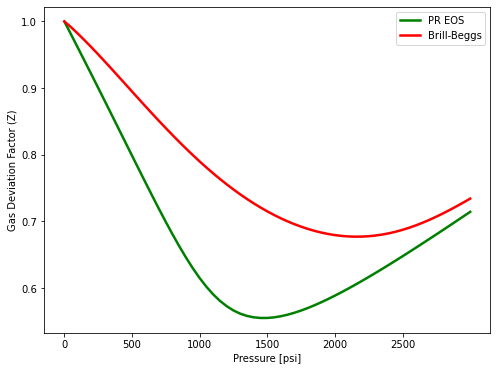

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(result_x,result_y,linewidth=2.5, color="green", label = "PR EOS")
plt.plot(result_x,result_ycorr,linewidth=2.5, color="red", label = "Brill-Beggs")
plt.xticks(np.arange(0, 3000, 500))
# plt.yticks(np.arange(0.86, 1.01, 0.01))
plt.xlabel("Pressure [psi]")
plt.ylabel("Gas Deviation Factor (Z)")
plt.legend()

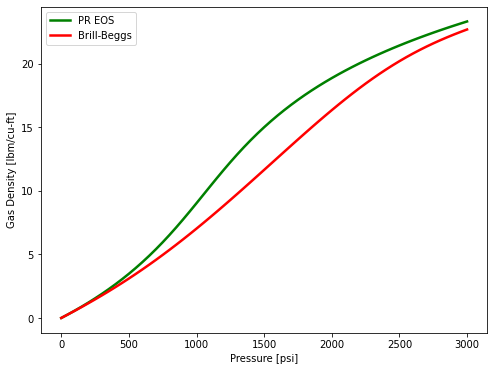

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(result_x,result_rho,linewidth=2.5, color="green", label = "PR EOS")
plt.plot(result_x,result_rhocorr,linewidth=2.5, color="red", label = "Brill-Beggs")
plt.xticks(np.arange(0, 3500, 500))
# plt.yticks(np.arange(0.86, 1.01, 0.01))
plt.xlabel("Pressure [psi]")
plt.ylabel("Gas Density [lbm/cu-ft]")
plt.legend()

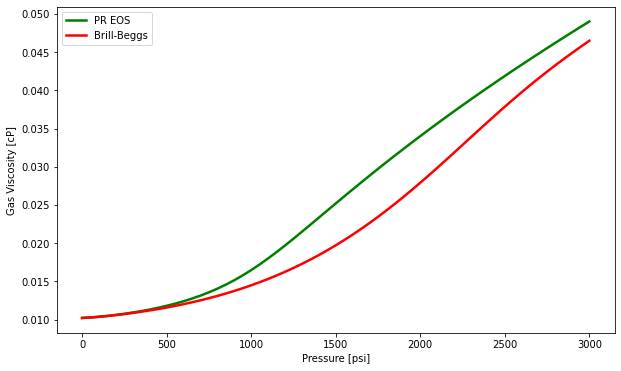

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(result_x,result_vis,linewidth=2.5, color="green", label = "PR EOS")
plt.plot(result_x,result_viscorr,linewidth=2.5, color="red", label = "Brill-Beggs")
plt.xticks(np.arange(0, 3500, 500))
# plt.yticks(np.arange(0.86, 1.01, 0.01))
plt.xlabel("Pressure [psi]")
plt.ylabel("Gas Viscosity [cP]")
plt.legend()

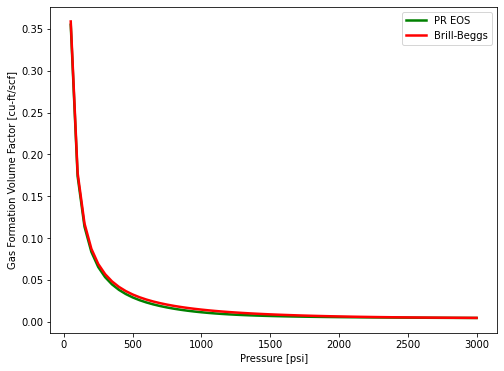

In [114]:
plt.figure(figsize=(8, 6))
result_Bg[0]=float('inf')
plt.plot(result_x,result_Bg,linewidth=2.5, color="green", label = "PR EOS")
plt.plot(result_x,result_Bgcorr,linewidth=2.5, color="red", label = "Brill-Beggs")
plt.xticks(np.arange(0, 3500, 500))
# plt.yticks(np.arange(0.86, 1.01, 0.01))
plt.xlabel("Pressure [psi]")
plt.ylabel("Gas Formation Volume Factor [cu-ft/scf]")
plt.legend()